# **BoomBikes Project**


**Project Summary:**

In this project, we're helping **BoomBikes**, a bike-sharing company in the US, figure out how to make more money after the COVID-19 pandemic. They've had a tough time during the pandemic, and now they want to plan better for when things get back to normal.

To do this, BoomBikes has hired a consulting company to study why people rent bikes. They want to know what things make people want to rent bikes and how much they want to rent them.

We've collected a lot of information about when and why people rent bikes, as well as weather data and details about people's preferences. We're going to use this data to build a computer model that can predict when and how much people will rent bikes.

This model will help BoomBikes make smart decisions about how to run their business. They can use it to understand what makes people want to rent bikes and how to meet that demand. It's like a roadmap to help BoomBikes do better in the future.

This Jupyter notebook will show you how we're doing all of this and what we find out along the way.

**Business Goal:**

Our task is to create a computer model that predicts how many bikes people will want to rent based on different things like weather and people's preferences. The company's leaders will use this model to see how bike demand changes with different factors. This way, they can adjust their business plan to make sure they have enough bikes for customers and keep customers happy. Additionally, this model will help the company understand how bike demand works in a new area they want to expand to.

**Business Risk:**
* No or less demand and high supply
* High demand and no or less supply

**Requirement:**
* Which variable are significant in predicting the demand for shared bikes
* How well those variabe describe the bike demands

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the pandas and numpy libraries
import pandas as pd
import numpy as np

In [4]:
# Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/day (1).csv")

In [5]:
# Looking at the first ten rows
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [6]:
# Now,lets look at the total number of rows and columns
data.shape

(730, 16)

As we can see, this dataset has:
* 730 Rows
* 16 Columns

In [7]:
# Now, lets check if the dataset has any null values
# Also lets have a look at the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here, we can see that there are no null-values present in the dataset.

In [8]:
# Now,lets get some more information about the dataset using describe() methods
# We want to see the count, mean, standard deviation, min, max and different quantile of the int and float columns
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The column **"instant"** represents record index and hence not useful in predition of the target variable **"cnt"**.

In [9]:
#Therefoe, lets drop the "instant" column
data.drop('instant',axis=1,inplace=True)

As per data dictionary **"casual"** and **"registered"** columns together form the target variable **"cnt"**.

In [10]:
# Lets check if the columns "casual" and "registered" together form the column "cnt"
(data.casual+data.registered == data.cnt).value_counts()

True    730
dtype: int64

From the above result, we can say that the columns **"casual"** and **"registered"** together form the columns **"cnt"**.

So, these columns are not useful to us.

In [11]:
# Therefore, lets drop these columns
data.drop(["casual","registered"],axis=1,inplace=True)

We can see the month and year already represented in other column. Lets retain only date from the column.

In [12]:
data['dteday'] = data.dteday.apply(lambda x : int(x[0:2]))

In [13]:
# Lets check the shape of the dataset again
# Also, lets look at the first 10 rows again
print("The shape of the new dataset after dropping the unnecessary columns is :")
print(data.shape)
print("The first 10 rows of the new dataset are: ")
data.head(10)

The shape of the new dataset after dropping the unnecessary columns is :
(730, 13)
The first 10 rows of the new dataset are: 


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,7,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,8,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,9,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


**Data Visualization:**

Now, we'll dive into a crucial step: **understanding the data**.
* If there is some obvious multicollinearity going on, this is the first place to catch it.
* Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.

To help us with this, we'll use matplotlib and seaborn for data visualization.

In [14]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#lets get the continuous variables from the list
for col in data.columns:
    if data[col].nunique() > 12 and (data[col].dtype == np.int64 or data[col].dtype == np.float64):
        print('"',col,'"',end=",",sep="")


"dteday","temp","atemp","hum","windspeed","cnt",

In [16]:
#lets get the categorical variables from the list
for col in data.columns:
    if data[col].nunique() <= 12 :
        print('"',col,'"',end=",",sep="")


"season","yr","mnth","holiday","weekday","workingday","weathersit",

In [17]:
#lets get the ones missied out in both
for col in data.columns:
    if data[col].nunique() > 12 and data[col].nunique()!=data.shape[0] and (data[col].dtype == object):
        print('"',col,'"',end=",",sep="")


In [18]:
cont_col = ["dteday","temp","atemp","hum","windspeed","cnt"]
cat_col = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
print(cont_col,cat_col)

['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'] ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


**UNIVARIATE ANALYSIS**

In [19]:
def plot_box_and_dist(col):
    sns.boxplot(data[col])
    plt.title("Boxplot for "+col)
    plt.show()
    sns.distplot(data[col])#distribution plot
    plt.title("Density Histogram for "+col)
    plt.show()
    print(data[col].describe())#Data metrics for the column selected
    print()
    print("*************************************************************************")

We have created a function named **"plot_box_and_dist"**.
-  This function is useful for visualizing the distribution of **continuous data** in a specific column.

- This function is a convenient way to visualize and summarize the distribution of a column in a dataset, making it easier to understand the data's characteristics and potential insights.

- It combines a boxplot, distribution plot, and descriptive statistics for the specified column.

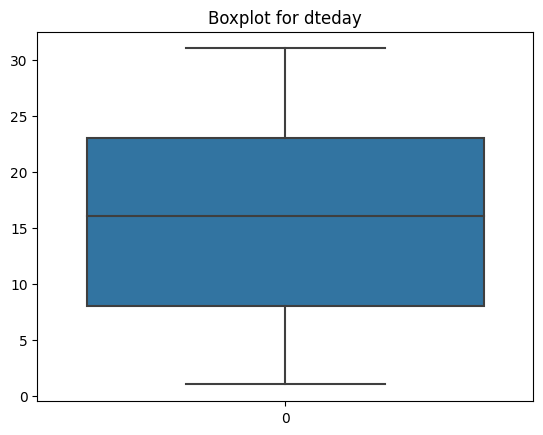

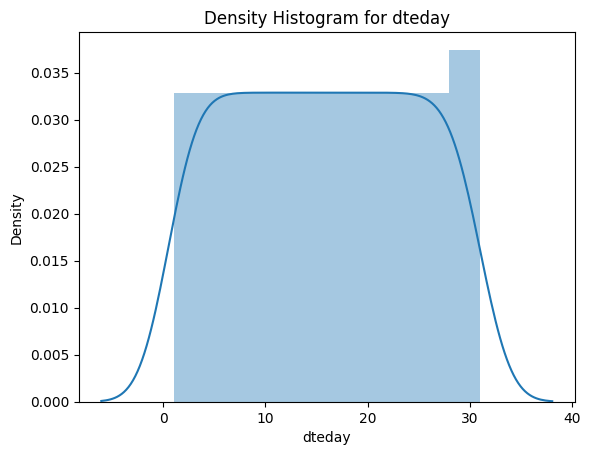

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

*************************************************************************


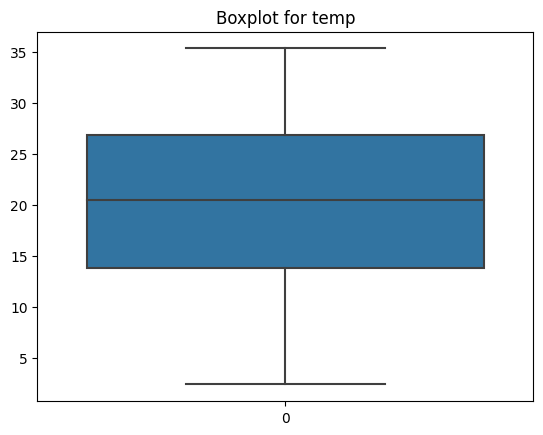

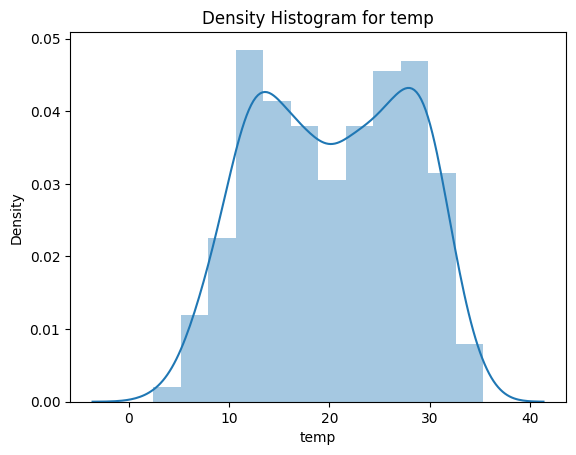

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

*************************************************************************


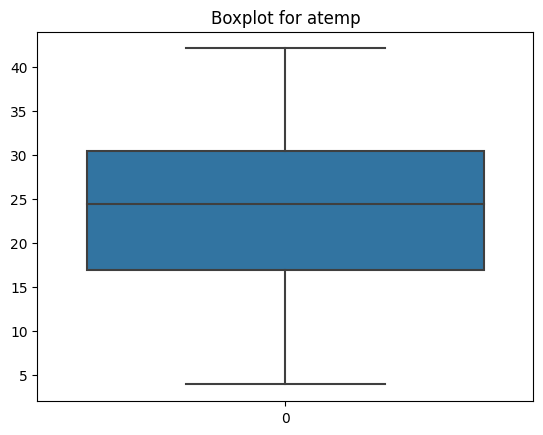

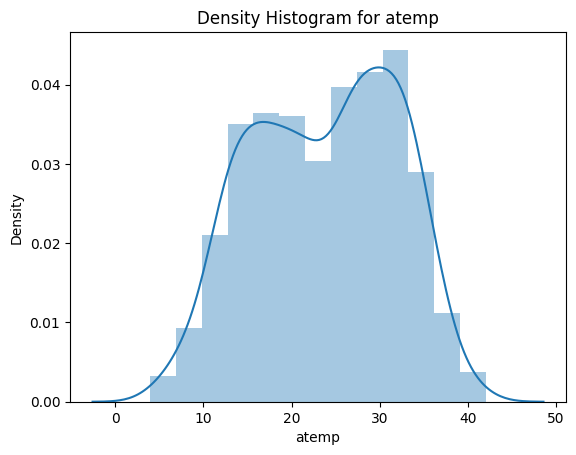

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

*************************************************************************


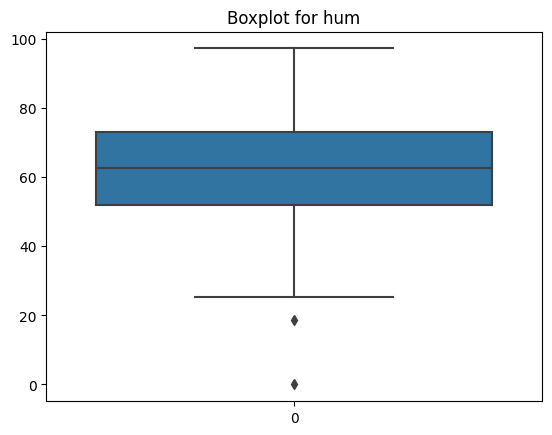

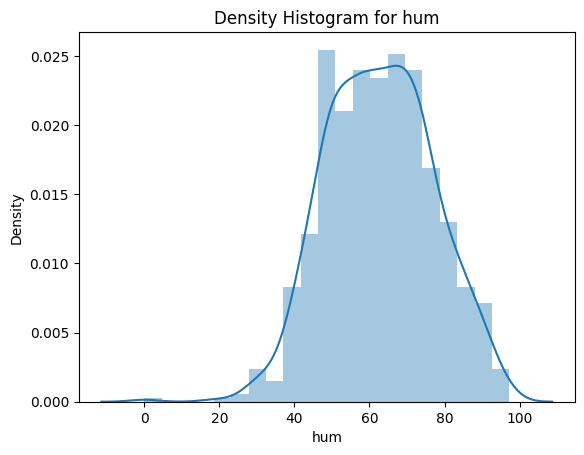

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

*************************************************************************


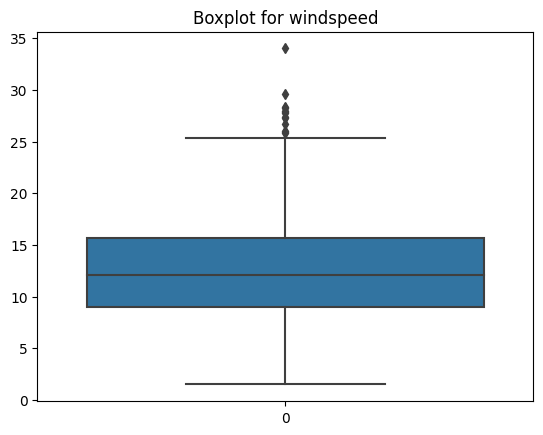

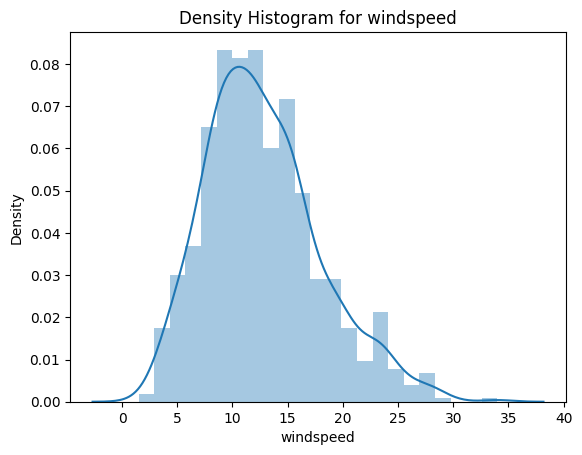

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

*************************************************************************


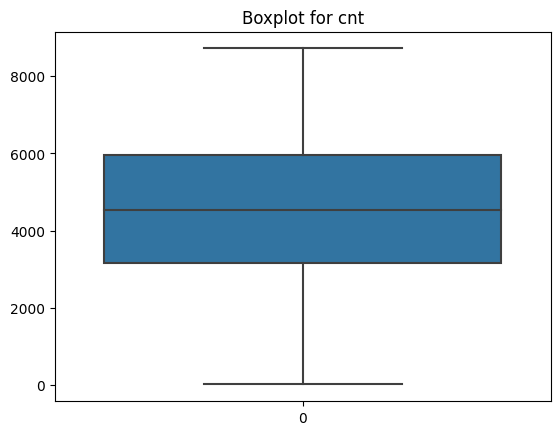

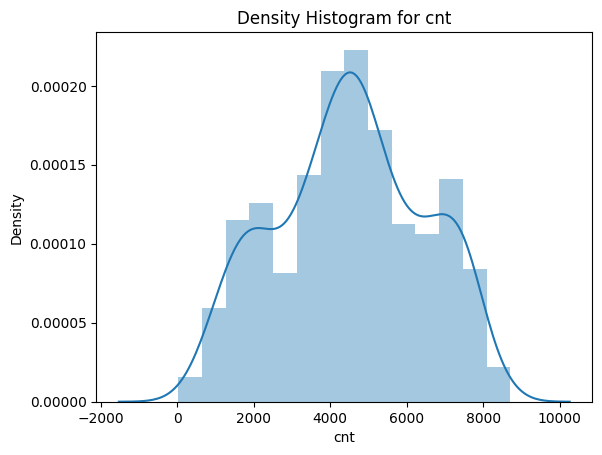

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

*************************************************************************


In [20]:
for col in cont_col:
    plot_box_and_dist(col)

**Key Findings from the above Visualizationare :**

* The quartiles for "atemp" are notably higher in comparison to "temp."

* The average temperature, represented by "temp," is 20.3, while the "atemp" (apparent temperature) averages at 23.7.

* The 25th and 75th percentiles for humidity, denoted as "hum," are 52 and 72, respectively.

* The 25th and 75th percentiles for windspeed are 9 and 15.

In [21]:
def plot_count(col):
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=col, order=sorted(data[col].unique()))
    plt.title("Countplot for "+col)
    plt.xticks(rotation=90)
    plt.show()
    print("*****************************************************************************************")

Now, we have created a function named **"plot_count"**.
- This function is useful for visualizing the distribution of **categorical data** in a specific column.
-  It provides a count of how many times each category appears in the dataset and presents this information in a bar chart.
- The function allows for better understanding and analysis of categorical variables in the dataset.

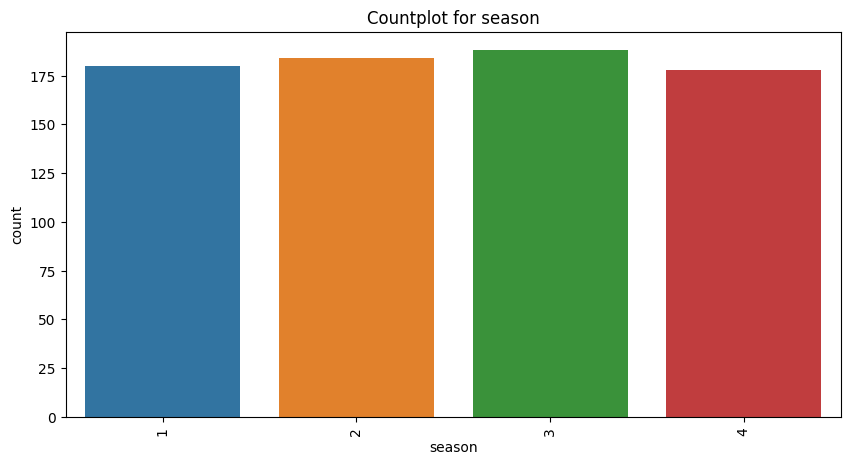

*****************************************************************************************


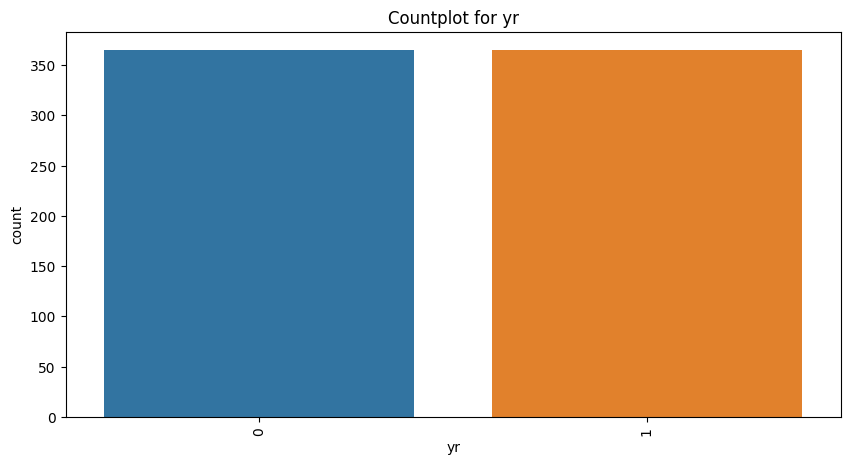

*****************************************************************************************


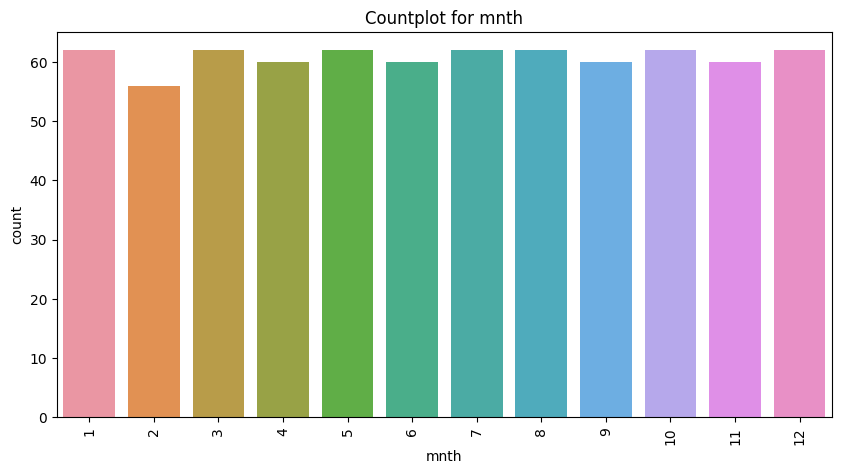

*****************************************************************************************


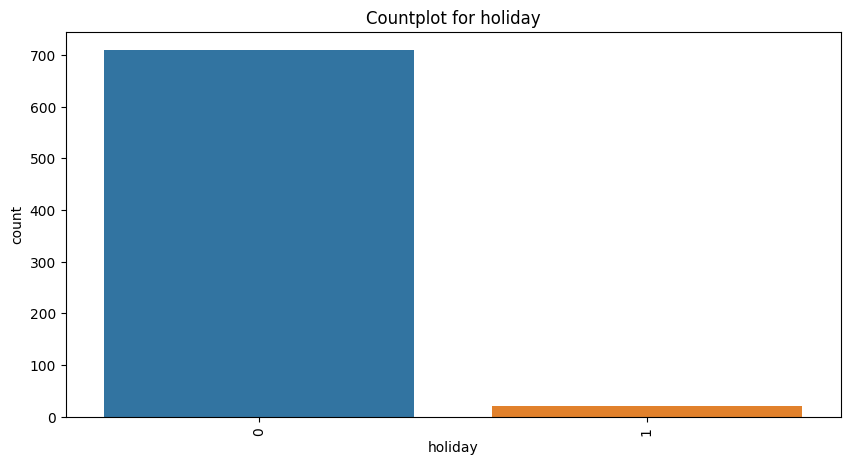

*****************************************************************************************


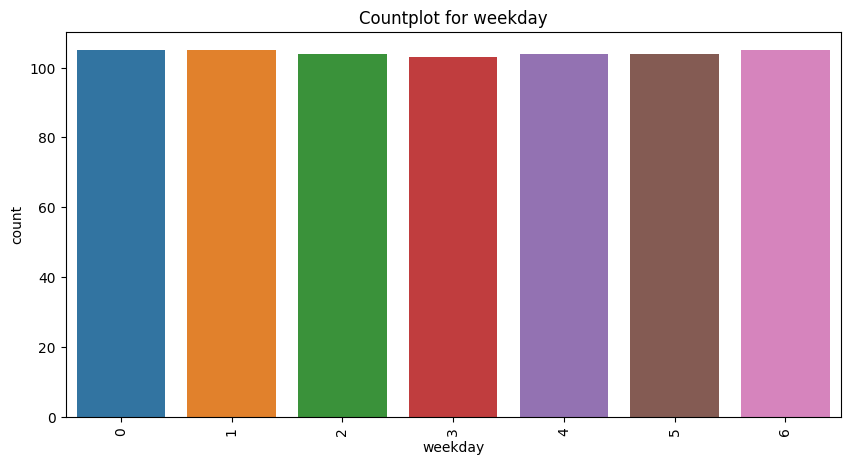

*****************************************************************************************


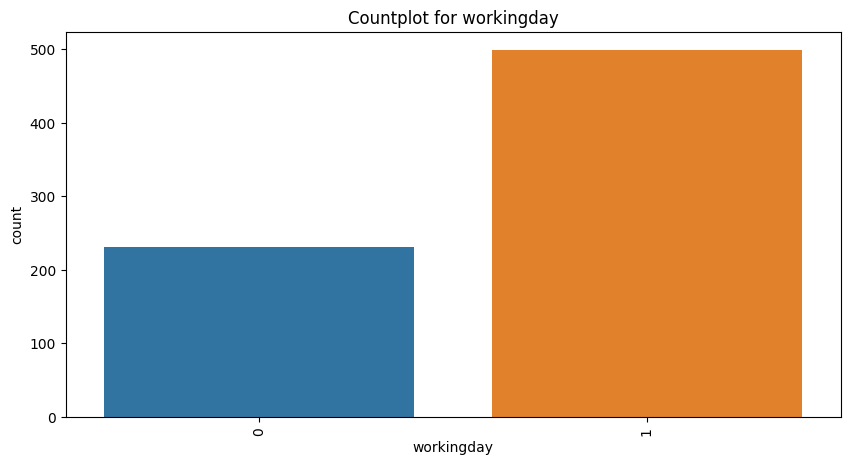

*****************************************************************************************


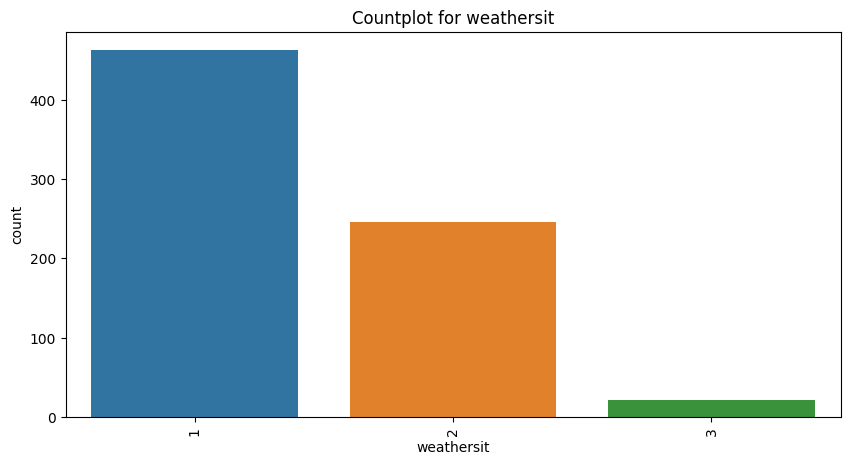

*****************************************************************************************


In [22]:
for col in cat_col:
    plot_count(col)

**Key Findings from the above Visulaization are :**
- The variables season, yr, mnth, and weekday exhibit similar count plots with an equal distribution among themselves.

- In contrast, the variables holiday, workingday, and weathersit display count plots that are not evenly distributed among themselves, indicating unequal representation within their respective categories.

**BIVARIATE ANALYSIS :**

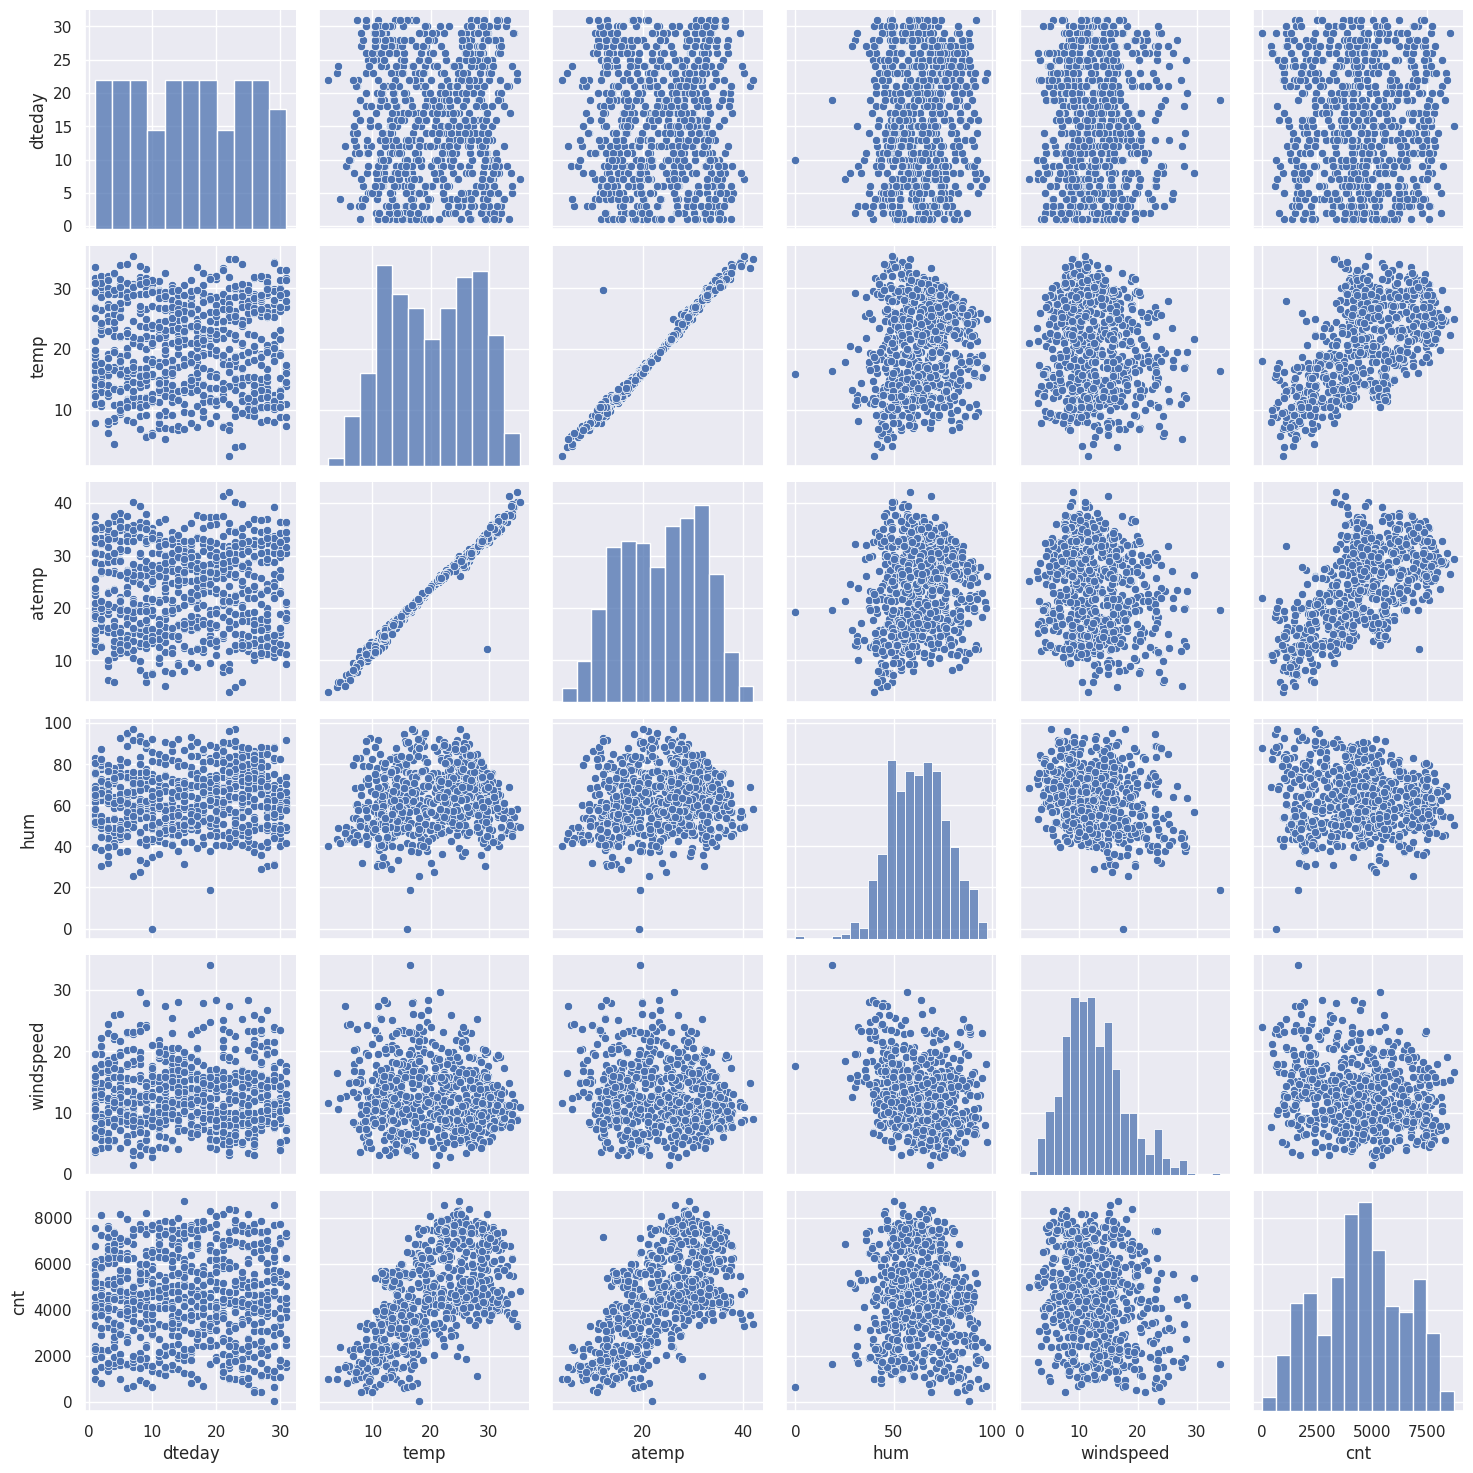

In [23]:
#Lets draw a pair plot for all the continuos columns
sns.set_theme(color_codes=True)
sns.pairplot(data[cont_col])
plt.show()

**Inference:**

i) Looks like the temp and atemp has the highest corelation with the target variable cnt.

ii) temp and atemp are highly co-related with each other.

Now,lets create bins for the continuous column so that we can convert them into categorical columns for the analysis.

In [24]:
dteday_bins = [0,5,10,15,20,25,30,35,40,45]
temp_bins = [0,5,10,15,20,25,30,35,40,45]
atemp_bins = [0,5,10,15,20,25,30,35,40,45]
hum_bins = [0,10,20,30,40,50,60,70,80,90,100]
windspeed_bins = [0,5,10,15,20,25,30,35,40,45]

In [25]:
pd.cut(data.temp, temp_bins)#lets use the cut method the assign the bin to each value of the column

0      (10, 15]
1      (10, 15]
2       (5, 10]
3       (5, 10]
4       (5, 10]
         ...   
725    (10, 15]
726    (10, 15]
727    (10, 15]
728    (10, 15]
729     (5, 10]
Name: temp, Length: 730, dtype: category
Categories (9, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (25, 30] <
                                         (30, 35] < (35, 40] < (40, 45]]

In [26]:
def plot_bar(col1,col2,bins):
    newdf = pd.DataFrame(data.cnt)
    newdf[col1] = data[col1]
    newdf[col2] = pd.cut(data[col2], bins)
    plt.figure(figsize=(10,4))
    graph = sns.barplot(y=data.cnt,x=newdf[col2],orient="v")#Bar Plot
    graph.axhline(data.cnt.mean())
    plt.title("Barplot for cnt for "+col2)
    plt.ylabel("cnt")
    plt.xlabel(col2)
    plt.xticks(rotation=90)
    plt.show()
    print("*****************************************************************************************")

Now we have created the function named **"plot_bar"** :
-  This function is designed to create a bar plot to visualize how the "cnt" values vary concerning the values in "col2".
- It also includes a reference line indicating the mean "cnt" value.
- This can help analyze the relationship between the two variables and understand the distribution of "cnt" across different categories of "col2".

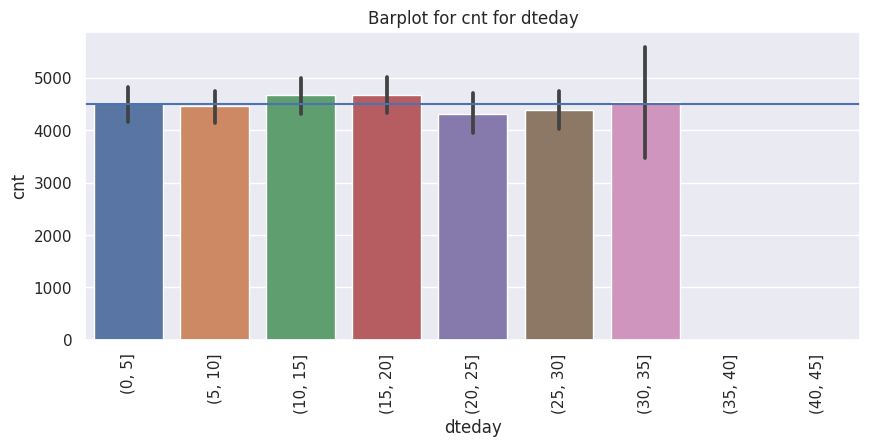

*****************************************************************************************


In [27]:
col1='cnt'
col2='dteday'
bins = dteday_bins
plot_bar(col1,col2,bins)

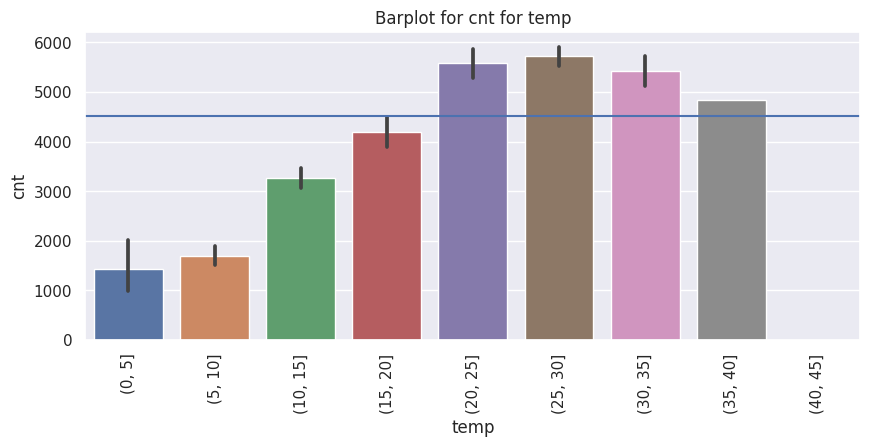

*****************************************************************************************


In [28]:
col1='cnt'
col2='temp'
bins = temp_bins
plot_bar(col1,col2,bins)


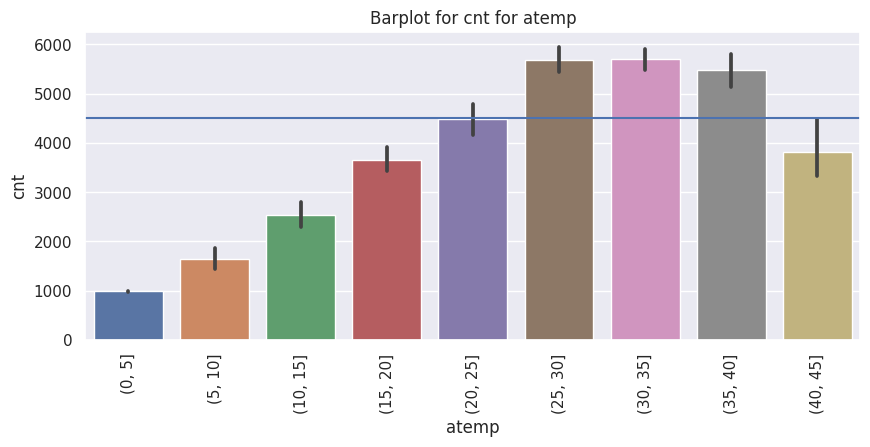

*****************************************************************************************


In [29]:
col1='cnt'
col2='atemp'
bins = atemp_bins
plot_bar(col1,col2,bins)

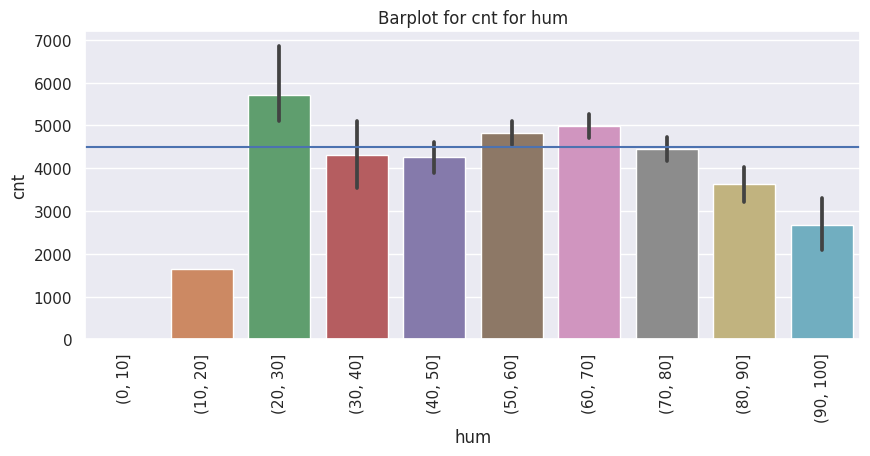

*****************************************************************************************


In [30]:
col1='cnt'
col2='hum'
bins = hum_bins
plot_bar(col1,col2,bins)

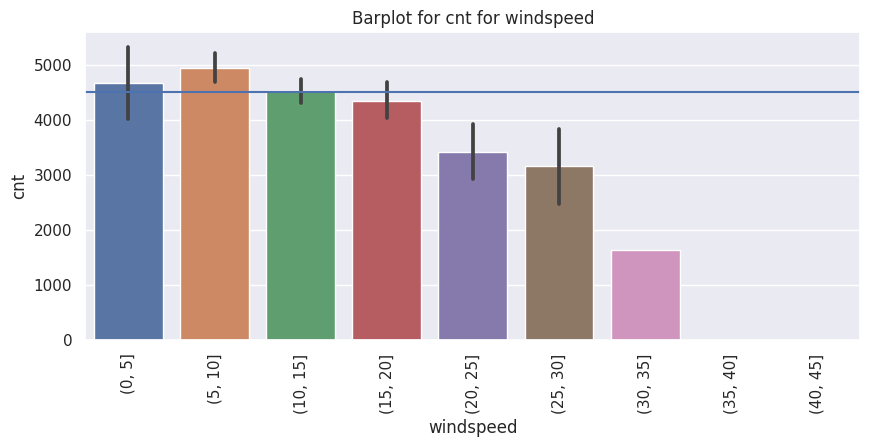

*****************************************************************************************


In [31]:
col1='cnt'
col2='windspeed'
bins = windspeed_bins
plot_bar(col1,col2,bins)

**IMPORTANT RESULTS FROM THE ABOVE ANALYSIS ARE :**
- **cnt**: The average daily bike demand is approximately 4,508 bikes.
- **dteday**: The date doesn't significantly impact bike demand.
- **temp**: Days with temperatures between 20-40 degrees Celsius see a higher average daily bike rental compared to the overall average. Additionally, this temperature range outperforms days with temperatures between 0-20 degrees.
- **atemp**: Days with temperatures between 25-40 degrees Celsius have a higher average daily bike rental compared to the overall average. They also outperform days with temperatures between 0-25 degrees.
- **hum**: Humidity levels between 20-30% result in a higher average daily bike rental compared to the overall average. This humidity range outperforms other humidity levels.
- **windspeed**: Days with windspeeds between 0-10 km/h have a higher average daily bike rental compared to the overall average. This windspeed range also outperforms other windspeed levels.

Now we will create a set of box plots, each showing the distribution of bike rental counts ("cnt") across different categories of categorical variables.

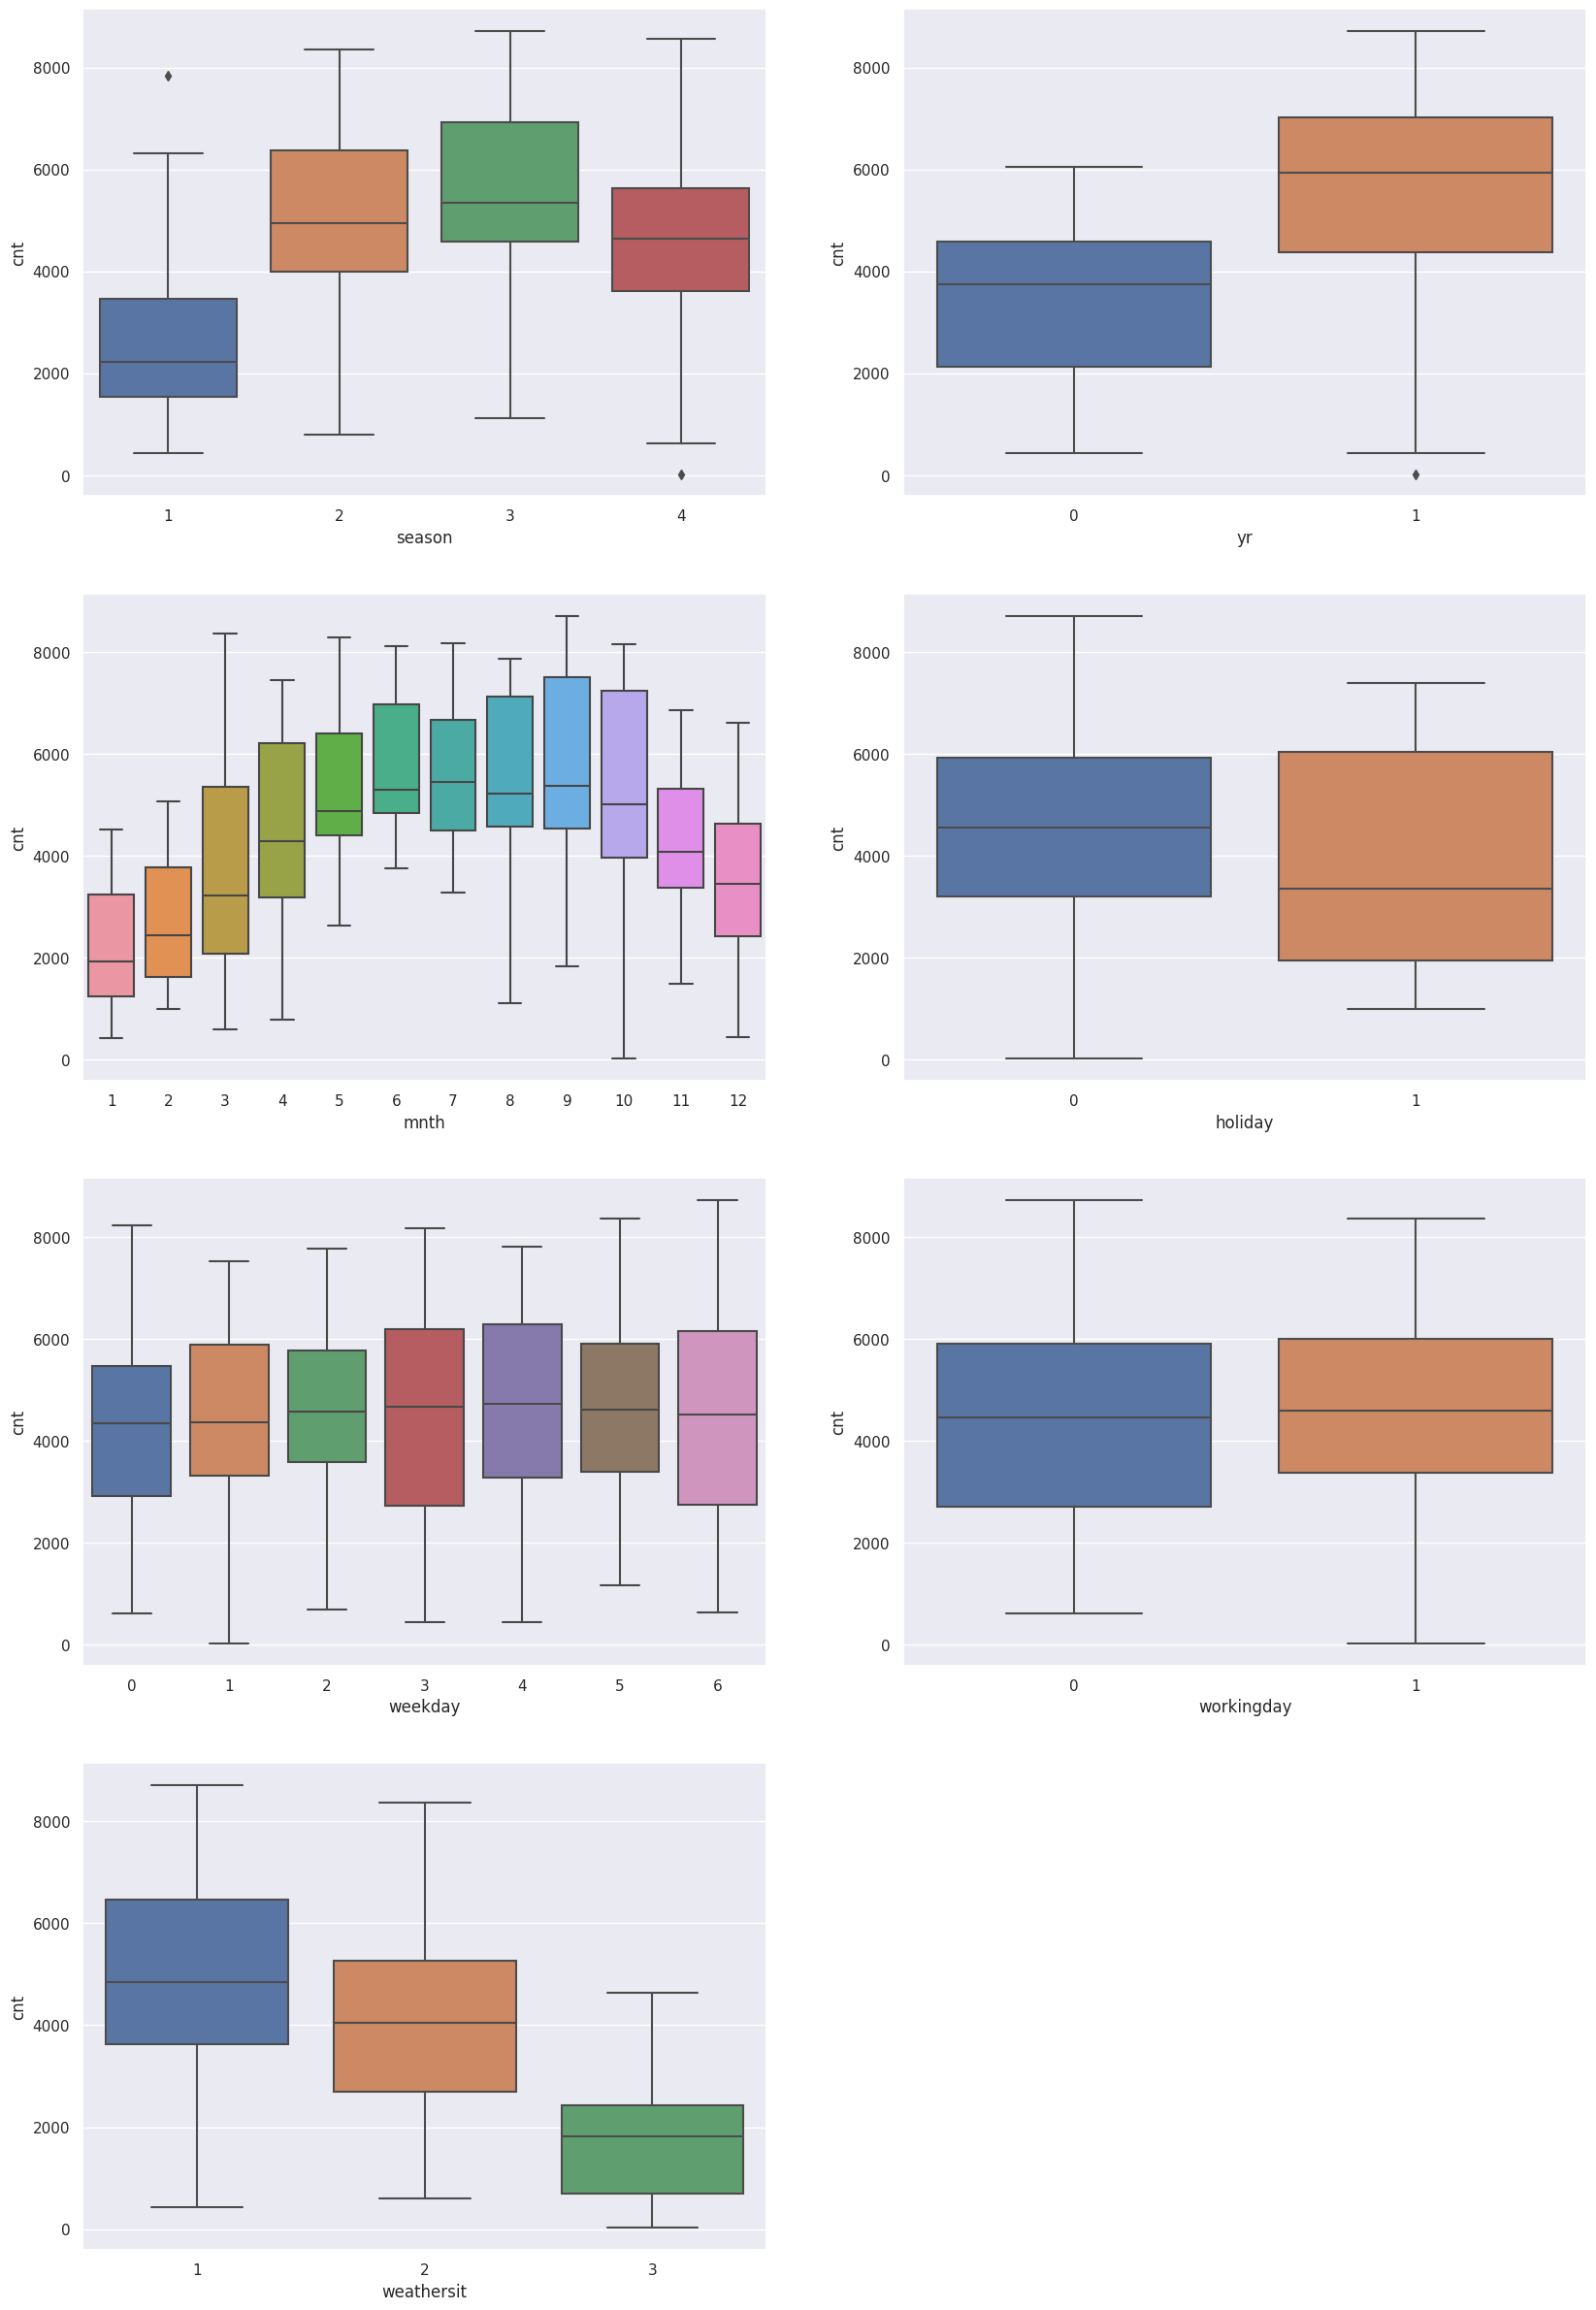

In [32]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,30))
for i in range(len(cat_col)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = cat_col[i], y = 'cnt', data = data)
plt.show()

**Inference:**

Here are some insights that can be drawn from the plots:-

1. Season: 3:fall has highest demand for rental bikes.
2. We can see that demand for next year has grown.
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing.
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

In [33]:
#Average rental bike per day
data.cnt.mean()

4508.006849315068

- Now, we will calculate and compare the average bike rental counts for different categories within each categorical column.
- It will help us to identify which categories have rental counts that are above or below the overall average, providing insights into the influence of categorical variables on bike rental demand.

In [34]:
for col in cat_col:
    print(pd.concat([(data.groupby(col).cnt.mean()).rename("Cnt Average"), (data.groupby(col).cnt.mean()>data.cnt.mean()).rename("Avg > Overall Avg")], axis=1).sort_values("Cnt Average"))
    print("***************************************************************")

        Cnt Average  Avg > Overall Avg
season                                
1       2608.411111              False
4       4728.162921               True
2       4992.331522               True
3       5644.303191               True
***************************************************************
    Cnt Average  Avg > Overall Avg
yr                                
0   3405.761644              False
1   5610.252055               True
***************************************************************
      Cnt Average  Avg > Overall Avg
mnth                                
1     2176.338710              False
2     2669.964286              False
12    3403.806452              False
3     3692.258065              False
11    4247.183333              False
4     4484.900000              False
10    5199.225806               True
5     5349.774194               True
7     5563.677419               True
8     5664.419355               True
9     5766.516667               True
6     5772.366667

**ANALYSIS :**
- **season**: Fall, Summer, and Winter exhibit higher average daily bike rentals compared to the overall average. Specifically, Fall and Summer surpass both Winter and Spring in terms of daily rentals.

- **yr**: The year 2019 shows a higher average daily bike rental compared to the overall average, outperforming the year 2018.

- **mnth**: Months 6, 9, 8, 7, 5, and 10 have higher average daily bike rentals compared to the overall average. In contrast, these months surpass months 4, 11, 3, 12, 2, and 1 in terms of daily rentals.

- **holiday**: Non-holidays have a higher average daily bike rental compared to the overall average. Non-holidays also outperform holidays in terms of daily rentals.

- **weekday**: Weekdays 2, 3, 4, 5, and 6 exhibit higher average daily bike rentals compared to the overall average. Specifically, these weekdays surpass Weekday 1 and Weekday 7 in terms of daily rentals.

- **workingday**: Working days show a higher average daily bike rental compared to the overall average. They also outperform non-working days in terms of daily rentals.

- **weathersit**: Weather conditions described as Clear, Few clouds, Partly cloudy, and Partly cloudy show higher average daily bike rentals compared to the overall average. These weather conditions also outperform weather conditions categorized as Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds, and Light Rain + Scattered clouds in terms of daily rentals.

**Correlation Matrix :**

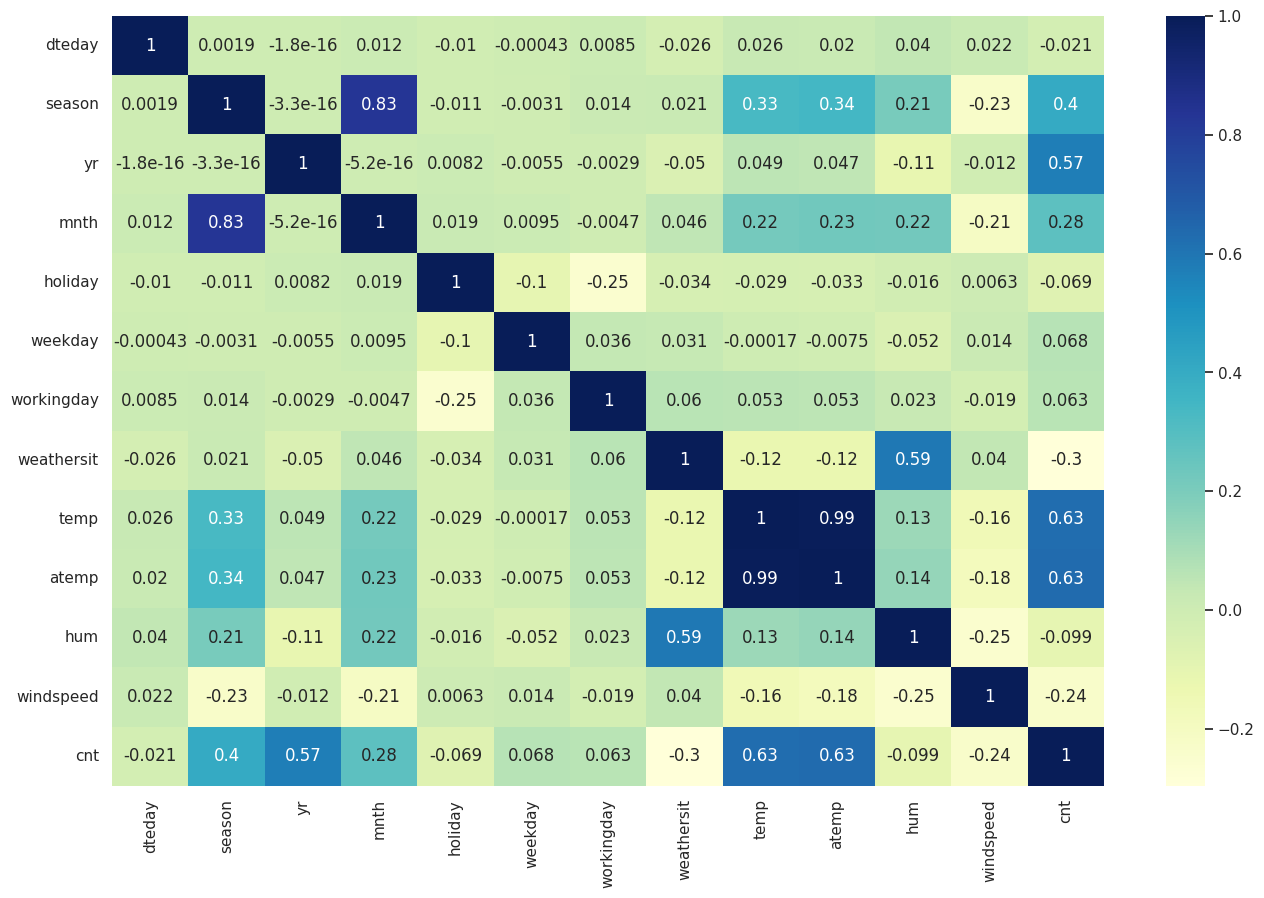

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

**ANALYSIS :**
- **temp, atemp, yr, season, and mnth**: These variables display strong correlations with the target variable "count."

- **temp and atemp**: Both "temp" and "atemp" show a perfect correlation with each other, indicating a strong relationship between these two temperature-related variables.

- **hum and weathersit**: "hum" and "weathersit" exhibit a high degree of correlation, suggesting a significant connection between humidity and weather conditions.

- **season with temp, atemp, hum**: The "season" variable demonstrates strong correlations with "temp," "atemp," and "hum," indicating notable relationships between the season and these weather-related factors.

**DATA PREPARATION :**
- The dataset contains columns with 'Yes' and 'No' values, which need to be converted into numerical values (1 for 'Yes' and 0 for 'No') for regression analysis.

- This transformation is necessary to ensure compatibility with regression modeling, where numerical data is required to build predictive models.

- Now, we will print a summary of the counts of unique values within specified categorical columns.
- It will help us to understand the distribution and frequency of each category in the dataset.

In [36]:
for col in ['season','mnth','weekday','weathersit']:
    print("Column Name :",col)
    print(data[col].value_counts())
    print("********************************************************************")

Column Name : season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
********************************************************************
Column Name : mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
********************************************************************
Column Name : weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
********************************************************************
Column Name : weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64
********************************************************************


- Now. we will enhance the readability and interpretability of the dataset by replacing numeric codes with meaningful categorical labels in the specified columns.

In [37]:
data.season = data.season.replace([1,2,3,4],['spring', 'summer', 'fall', 'winter'])
data.weathersit = data.weathersit.replace([1,2,3],['clear', 'mist', 'light_snow'])

- Dropping the first columns as (p-1) dummies can explain p categories.

- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [38]:
data = pd.get_dummies(data, columns = ['season','mnth','weekday','weathersit'],drop_first = True)
print(data.columns)


Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')


**Splitting the Data into Training and Testing Sets :**

Now we will perform the first basic step for Regression, that is **performing a train-test split.**

In [39]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

**Rescaling the Features :**
- As you've seen in the Simple Linear Regression demonstration, scaling isn't always crucial for your model's performance. However, in our case, most columns have small integer values, except for 'area.' To ensure that all variables are on a similar scale, we need to rescale them.

- If we skip this step, some of the coefficients in our regression model might become either very large or very small compared to others. This can cause problems when evaluating the model. To avoid such issues, we recommend using either Min-Max scaling or Standardization (mean-0, sigma-1) to ensure that all coefficients are on the same scale.

- For this analysis, we will use Min-Max scaling.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
df_train.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,15.613725,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,8.899450,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
for col in df_train.columns:
    if df_train[col].max() > 1 or df_train[col].min() <0:
        print(col,"----",df_train[col].min())
        print(col,"----",df_train[col].max())

dteday ---- 1
dteday ---- 31
temp ---- 2.4243464
temp ---- 35.328347
atemp ---- 3.95348
atemp ---- 42.0448
hum ---- 0.0
hum ---- 97.0417
windspeed ---- 2.8343814
windspeed ---- 34.000021
cnt ---- 22
cnt ---- 8714


In [44]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['dteday','temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.487124,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.296648,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
for col in df_train.columns:
    if df_train[col].max() > 1 or df_train[col].min() <0:
        print(col,"----",df_train[col].min())
        print(col,"----",df_train[col].max())

cnt ---- 0.0
cnt ---- 1.0000000000000002


**Dividing into X and Y sets for the model building :**

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

**Building our model using RFE :**

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=1)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
#lets sort based on the rank
l1 = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
sorted(l1,key=lambda x : x[2])

[('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('yr', False, 4),
 ('weathersit_light_snow', False, 5),
 ('season_spring', False, 6),
 ('holiday', False, 7),
 ('mnth_9', False, 8),
 ('season_winter', False, 9),
 ('weathersit_mist', False, 10),
 ('mnth_5', False, 11),
 ('mnth_3', False, 12),
 ('mnth_4', False, 13),
 ('mnth_6', False, 14),
 ('mnth_8', False, 15),
 ('mnth_10', False, 16),
 ('weekday_6', False, 17),
 ('workingday', False, 18),
 ('season_summer', False, 19),
 ('atemp', False, 20),
 ('mnth_2', False, 21),
 ('mnth_7', False, 22),
 ('mnth_11', False, 23),
 ('mnth_12', False, 24),
 ('weekday_1', False, 25),
 ('weekday_2', False, 26),
 ('weekday_5', False, 27),
 ('dteday', False, 28),
 ('weekday_3', False, 29),
 ('weekday_4', False, 30)]

In [51]:
#lets select the Top 18 columns based on the RFE rank
colT18 = X_train.columns[rfe.ranking_<=18]
colT18

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

- Now, lets define a function named **linearRegression** to create a linear regresion model which prints the statistics and the VIF values and returns the model

In [52]:

def linearRegression(X_train,y_train):
    # Adding a constant variable
    X_train_rfe = sm.add_constant(X_train)

    #Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    #Let's see the summary of our linear model
    print(lm.summary())

    print("*********************************************************\n")

    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_rfe.drop("const",axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return X_train_rfe,lm

In [53]:
#Lets create the first model with all columns
model_1 = linearRegression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          8.09e-180
Time:                        14:46:07   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [54]:
#lets create a model with the top 18 columns selected by RFE
model_1 = linearRegression(X_train[colT18],y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          1.05e-189
Time:                        14:46:07   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

**ANALYSIS :**

We can see that:
- **hum, temp and workingday** have VIF value greater than 5.
- **holiday** has p value greater than 0.05.


**As the p-value for the column "holiday" is greater than 0.05, so lets drop "holiday".**

In [55]:
X_train_minusholiday = X_train[colT18].drop(['holiday'], axis=1)
model_1 = linearRegression(X_train_minusholiday,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          3.91e-190
Time:                        14:46:07   Log-Likelihood:                 522.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

**We can see that :**

- **hum, temp and workingday** have VIF value, greater than 5.

Lets drop **hum** as it has a higher VIF value.

In [56]:
X_train_minushum = X_train_minusholiday.drop(['hum'], axis=1)
model_1 = linearRegression(X_train_minushum,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          7.37e-188
Time:                        14:46:07   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

**We can see that :**

- **temp** has a  VIF value greater than 5.

So, lets drop "temp" as it has a high VIF value.

In [57]:
X_train_minustemp = X_train_minushum.drop(['temp'], axis=1)
model_1 = linearRegression(X_train_minustemp,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     127.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          6.65e-159
Time:                        14:46:07   Log-Likelihood:                 442.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     494   BIC:                            -784.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.45

Here, we can see that there is a significant drop in the the r2 and adj r2 values for the model.

**Hence the column "temp" cannot be dropped from the table**.

**FINAL MODEL :**

In [58]:
X_train_minushum = X_train_minusholiday.drop(['hum'], axis=1)
X_train_rfe,lm = linearRegression(X_train_minushum,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          7.37e-188
Time:                        14:46:07   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [59]:
# Lets have a look at the coefficents of the model for different features.
lm.params.sort_values()

weathersit_light_snow   -0.296761
windspeed               -0.154429
weathersit_mist         -0.083826
season_spring           -0.075924
mnth_10                  0.049952
mnth_8                   0.051156
workingday               0.053324
mnth_3                   0.062035
mnth_6                   0.063313
weekday_6                0.065144
mnth_4                   0.070493
season_winter            0.083347
mnth_5                   0.088043
mnth_9                   0.112402
const                    0.169345
yr                       0.235197
temp                     0.412069
dtype: float64

**Key Findings :**
- Variables like **'wethersit_light_snow,' 'windspeed,' 'weathersit_mist,' and 'season_spring'** show an indirect relationship with the target variable "cnt."

- Conversely, **'mnth_10,' 'mnth_8,' 'workingday,' 'mnth_3,' 'mnth_6,' 'weekday_6,' 'mnth_4,' 'season_winter,' 'mnth_5,' 'mnth_9,' 'yr,' and 'temp'** exhibit a direct relationship with the target variable "cnt."

In [60]:
#Now, lets create an equation for our model
print("cnt = ",end='')
for index in lm.params.index:
    print(index,"*",round(lm.params[index],3),end=' + ')
print(0)


cnt = const * 0.169 + yr * 0.235 + workingday * 0.053 + temp * 0.412 + windspeed * -0.154 + season_spring * -0.076 + season_winter * 0.083 + mnth_3 * 0.062 + mnth_4 * 0.07 + mnth_5 * 0.088 + mnth_6 * 0.063 + mnth_8 * 0.051 + mnth_9 * 0.112 + mnth_10 * 0.05 + weekday_6 * 0.065 + weathersit_light_snow * -0.297 + weathersit_mist * -0.084 + 0


In [61]:
# Now, we will sort the coefficents of the model
abs(lm.params).sort_values()

mnth_10                  0.049952
mnth_8                   0.051156
workingday               0.053324
mnth_3                   0.062035
mnth_6                   0.063313
weekday_6                0.065144
mnth_4                   0.070493
season_spring            0.075924
season_winter            0.083347
weathersit_mist          0.083826
mnth_5                   0.088043
mnth_9                   0.112402
windspeed                0.154429
const                    0.169345
yr                       0.235197
weathersit_light_snow    0.296761
temp                     0.412069
dtype: float64

**Prediction for Training Data :**

In [62]:
y_train_cnt = lm.predict(X_train_rfe)

**Verification of Linear Regression Assumptions**


* **Assessment of the Assumption of Normally Distributed Error Terms :**
  
   Residual Analysis of the train data:-
 - To examine whether the error terms adhere to the assumption of normal distribution (a fundamental assumption in linear regression), we'll create a histogram of the error terms to visually assess their distribution.







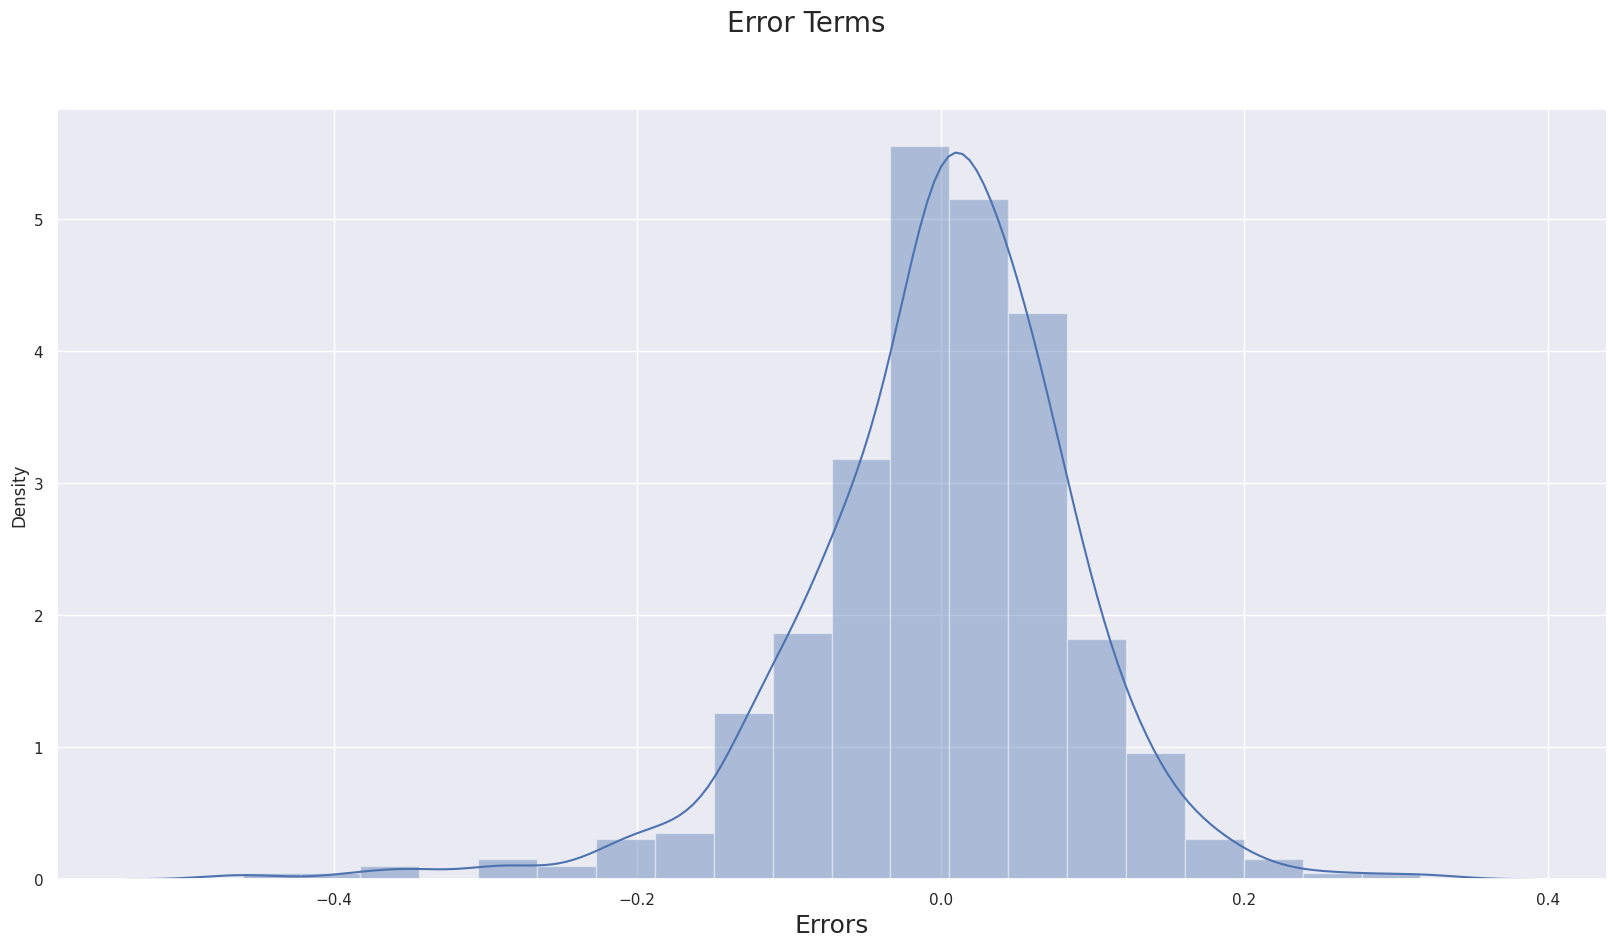

In [63]:
# Plotting the histogram of the error terms
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show() # X-label

- Errors are normally distribured here with mean 0. So everything seems to be fine.

* **Assessment of the Assumption of Error Terms Being Independent :**

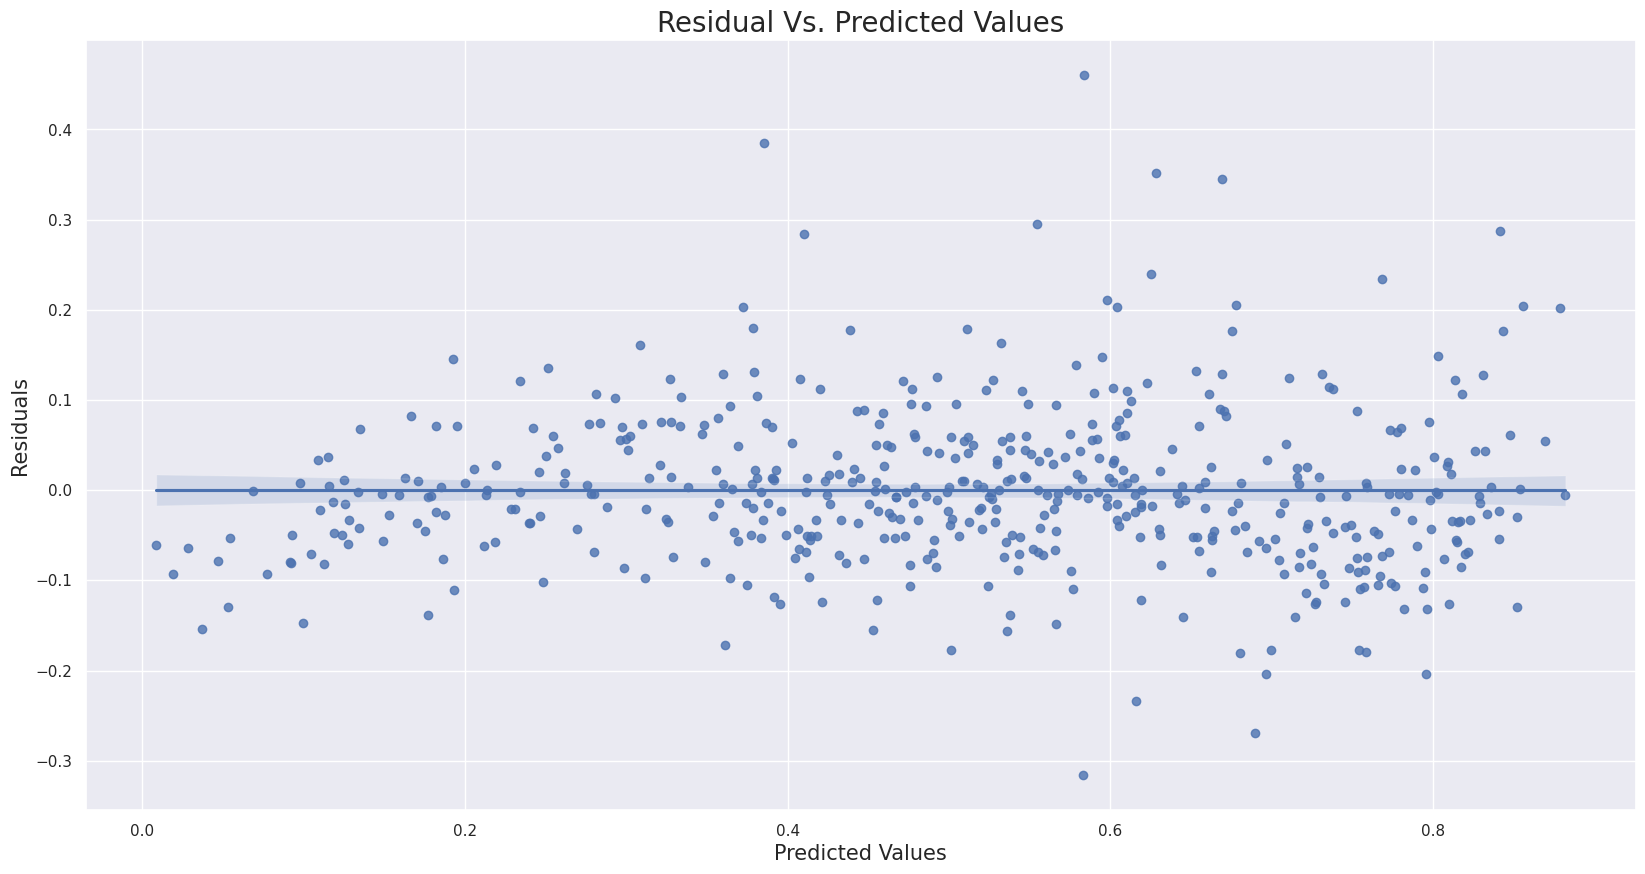

In [64]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train_cnt, y=y_train_cnt - y_train)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

- As we can see the Residual terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

* **Assessment of the Assumption of the Homoscedasticity :**

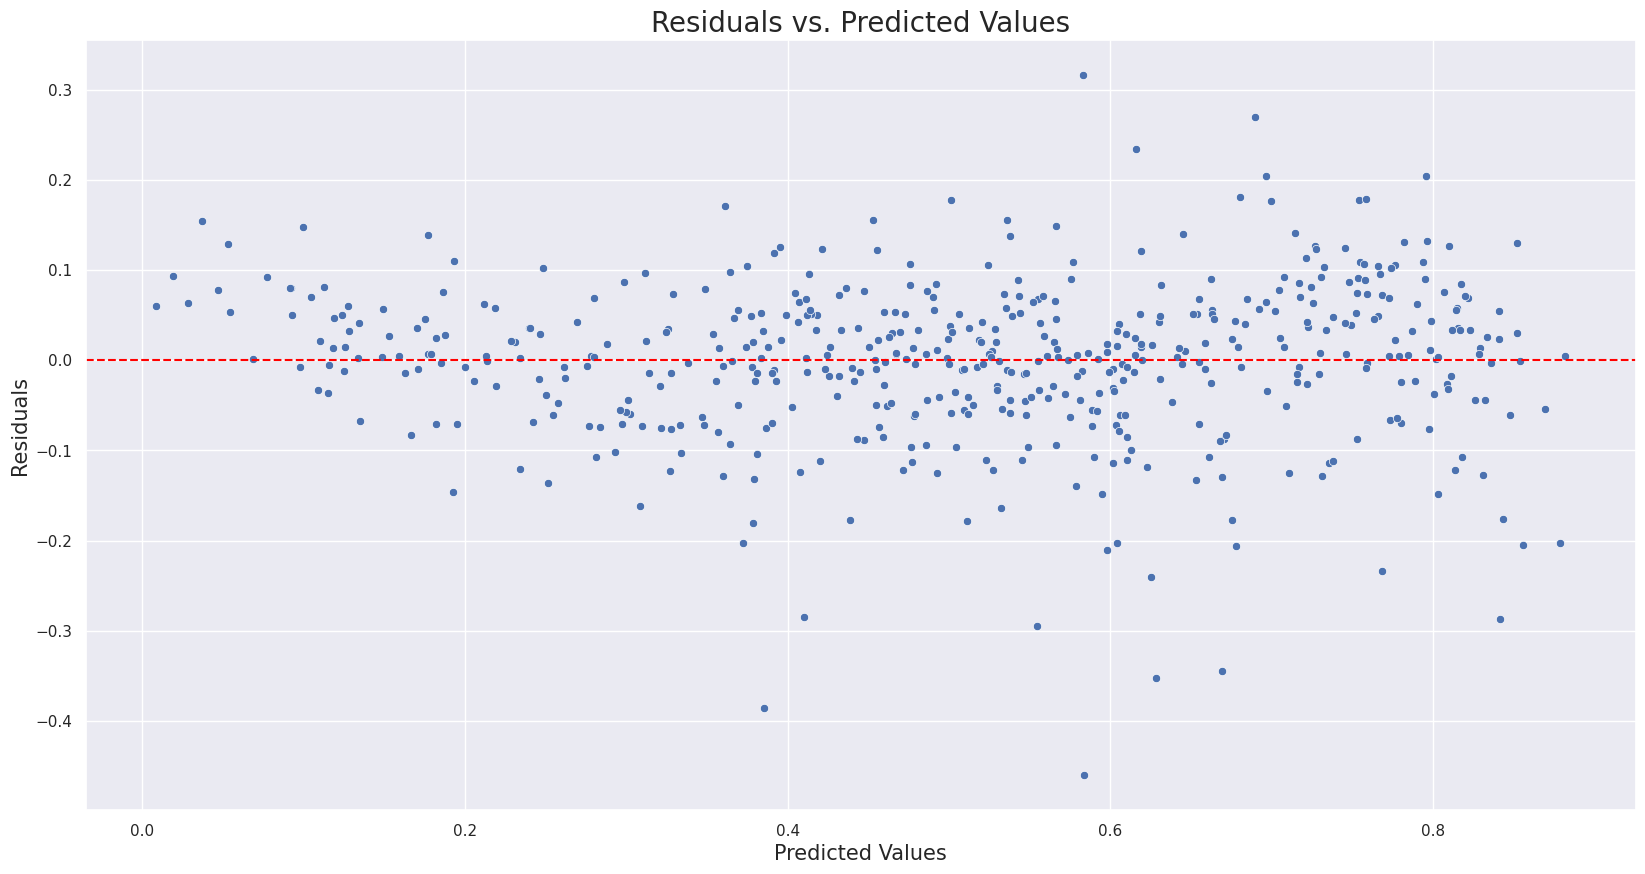

In [65]:
residuals = y_train - y_train_cnt

# Create a scatter plot of residuals vs. predicted values
sns.set_theme(color_codes=True)
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_train_cnt, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

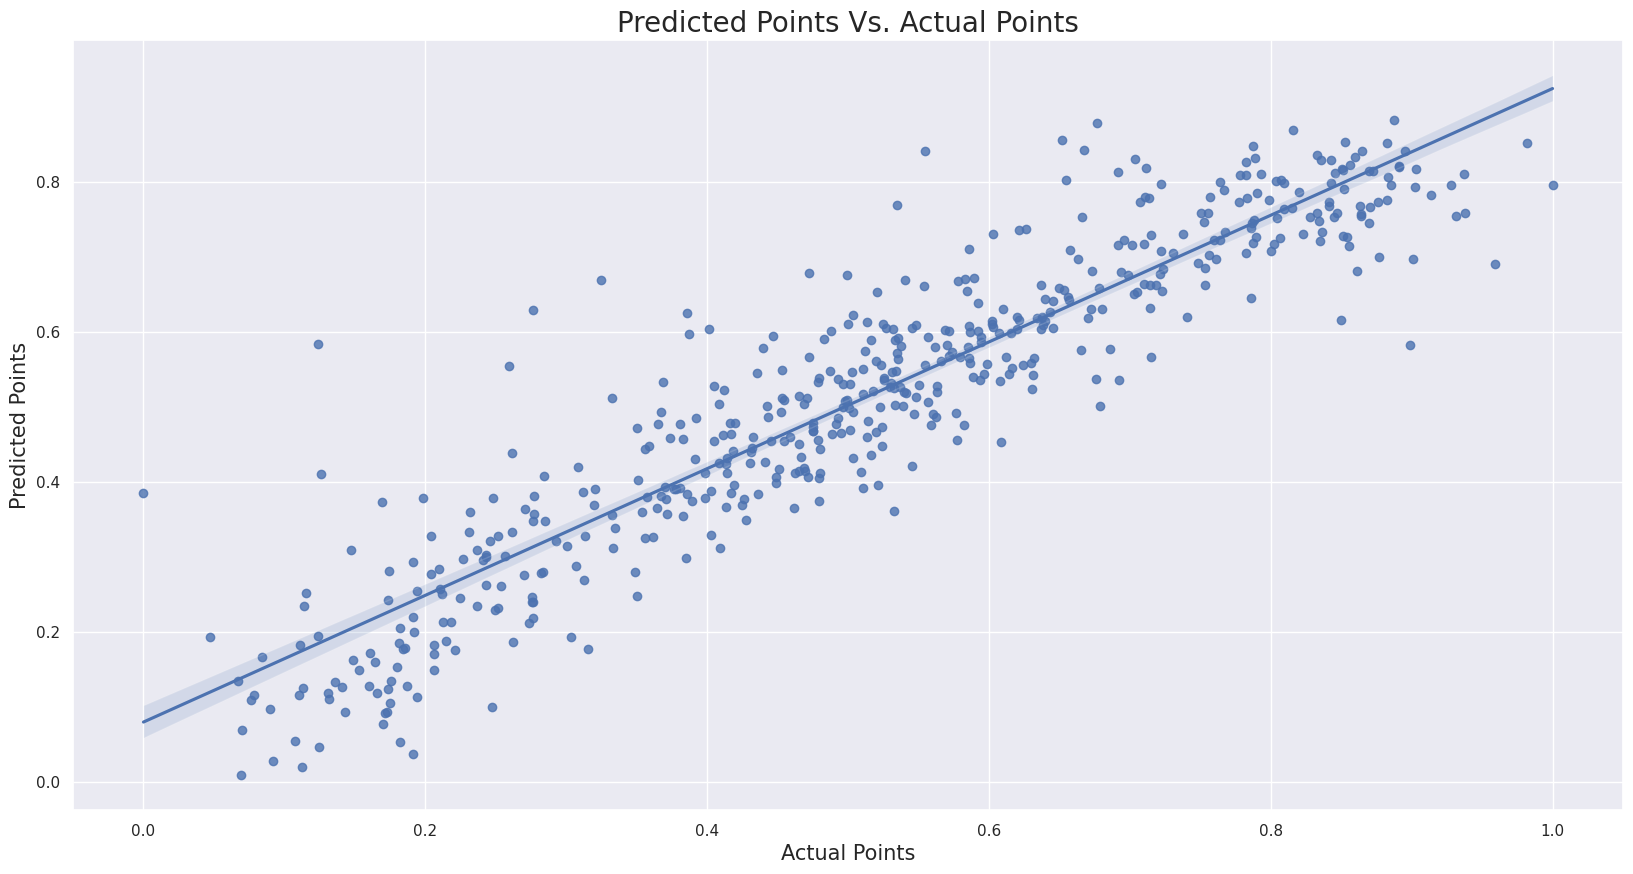

In [66]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train, y=y_train_cnt)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

- R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

* **Assessment of the Assumption of Multicorrelation :**

In [67]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe.drop("const",axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features   VIF
2                    temp  8.11
3               windspeed  4.73
1              workingday  4.67
5           season_winter  2.54
4           season_spring  2.35
0                      yr  2.09
10                 mnth_8  1.94
13              weekday_6  1.83
9                  mnth_6  1.68
8                  mnth_5  1.63
12                mnth_10  1.62
7                  mnth_4  1.57
15        weathersit_mist  1.57
11                 mnth_9  1.50
6                  mnth_3  1.36
14  weathersit_light_snow  1.10


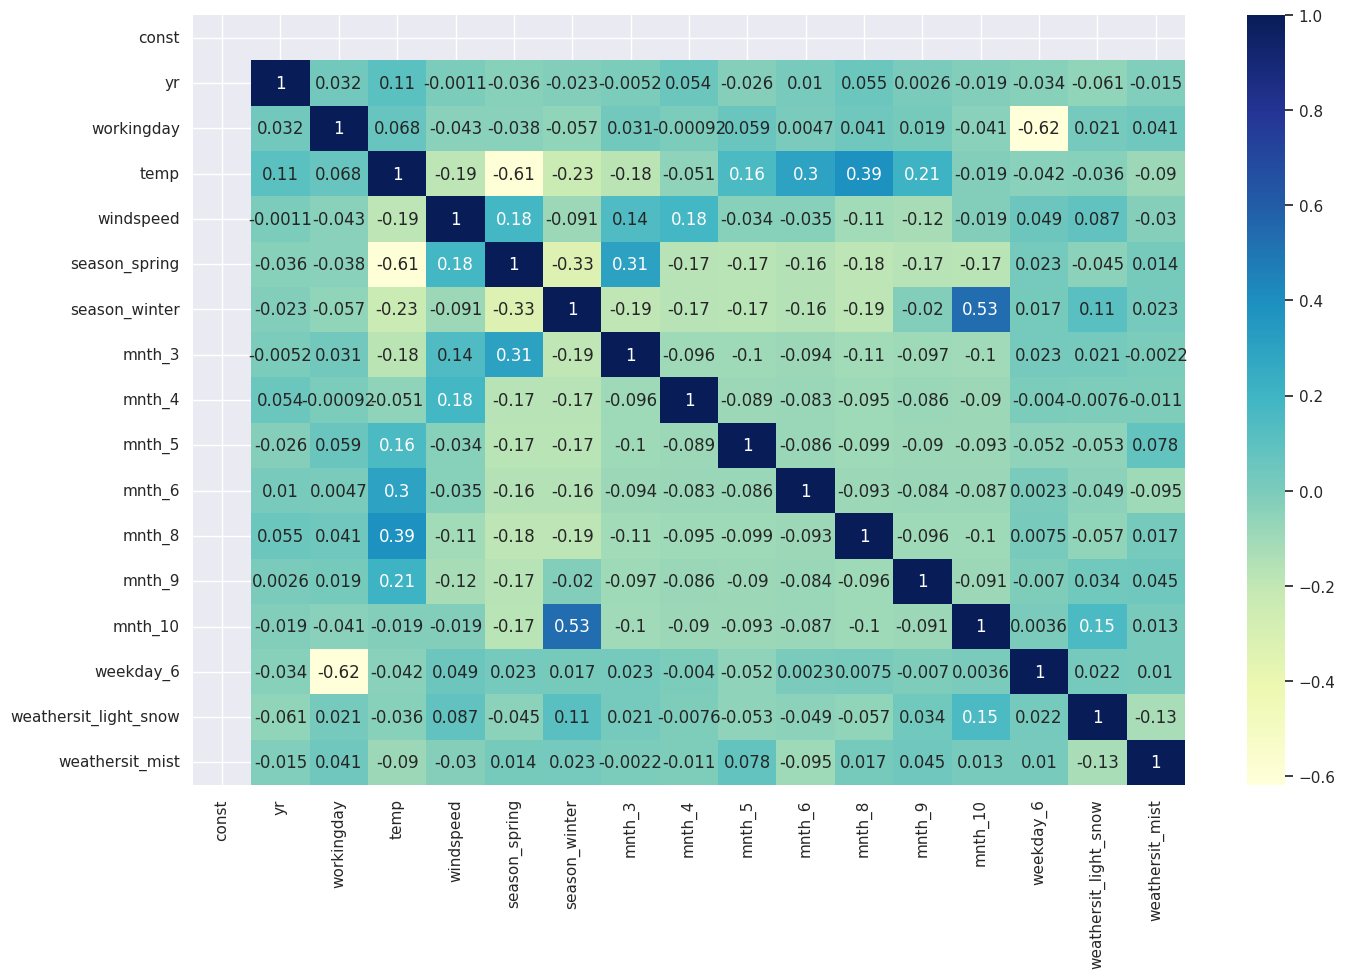

In [68]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Prediction for Test Data**
* **Applying the scaling on the test sets :**

In [69]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [70]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Now we'll use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_light_snow',
       'weathersit_mist']]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions
y_pred = lm.predict(X_test_new)

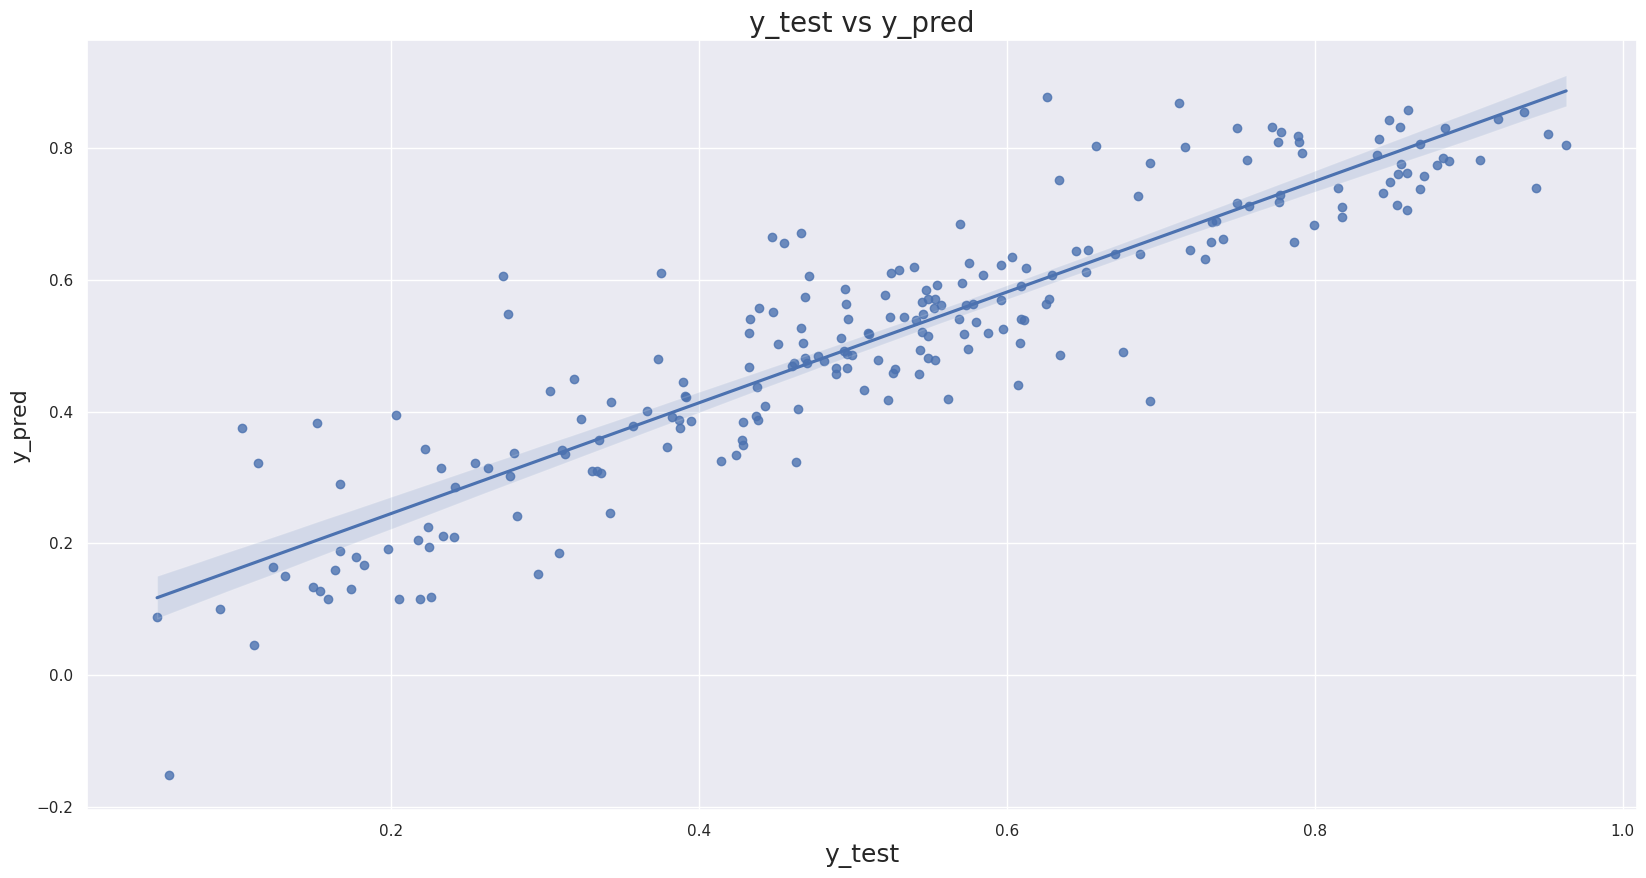

In [74]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20, 10))
sns.regplot(x=y_test, y=y_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()  # Show the plot

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8219243498301338

**KEY FINDINGS FROM THE OVERALL ANALYSIS**


* **EXPLORATORY DATA ANALYSIS :**
  * **EDA on Continuous Variables :-**
    1. **cnt**: The average daily demand for bikes is approximately 4508.
    2. **dteday**: Date does not significantly impact bike demand.
    3. **temp**: Bike rentals are higher when the temperature ranges between 20 to 40 degrees Celsius, surpassing rentals during cooler temperatures (0-20 degrees).
    4. **atemp**: Rentals peak when the temperature ranges from 25 to 40 degrees Celsius, exceeding rentals during cooler temperatures (0-25 degrees).
    5. **hum**: Higher average rentals occur when humidity levels range from 20% to 30%, outperforming other humidity levels.
    6. **windspeed**: Average rentals are highest when wind speeds are between 0 and 10 mph, surpassing rentals during higher wind conditions.
  * **EDA on Categorical Variables :-**
    1. **season**: Fall, Summer, and Winter exhibit higher average daily bike rentals compared to the overall average, with Fall and Summer surpassing Winter and Spring.
    2. **yr**: Bike rentals in 2019 are higher than the overall average and surpass those in 2018.
    3. **mnth**: Months 6, 9, 8, 7, 5, and 10 have higher average daily bike rentals compared to the overall average, outperforming months 4, 11, 3, 12, 2, and 1.
    4. **holiday**: Non-holidays see higher average daily bike rentals compared to the overall average, outperforming holidays.
    5. **weekday**: Weekdays 2, 3, 4, 5, and 6 have higher average daily bike rentals compared to the overall average, with 2, 3, 4, 5, and 6 surpassing Weekday 1 and 7.
    6. **workingday**: Working days exhibit higher average daily bike rentals compared to the overall average, outperforming non-working days.
    7. **weathersit**: Weather conditions described as Clear, Few clouds, Partly cloudy, and Partly cloudy yield higher average daily bike rentals compared to the overall average. These conditions outperform weather conditions categorized as Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds, and Light Rain + Scattered clouds.
* **Performance of Different Models with R2 Values :**
    1. Model with All Variables:
      
      R2 = 0.853
      
      Adjusted R2 = 0.845
    2.  Model with Top 18 Variables Selected using RFE:

      R2 = 0.851
      
      Adjusted R2 = 0.846
    3.  Model with Holiday Dropped (p-value > 0.05):

      R2 = 0.850

      Adjusted R2 = 0.845
    4.  Model with Humidity Dropped (VIF value > 5):

      R2 = 0.845
      
      Adjusted R2 = 0.840
    5.  Model with Temperature Dropped (VIF value > 5):

      R2 = 0.795

      Adjusted R2 = 0.788
    
    Considering that dropping temperature("temp" column) results in a 5% loss of variance explained, we opt to retain temperature and finalize the fourth model for predicting test data.
* **R2 value for Test Data :**

    R2 = 0.821
* **Analysis Based on Coefficient Values:**
    1. Variables like **'wethersit_light_snow,' 'windspeed,' 'weathersit_mist,' and 'season_spring'** exhibit an indirect relationship with the target variable **"cnt."**
    2. Conversely, **'mnth_10,' 'mnth_8,' 'workingday,' 'mnth_3,' 'mnth_6,' 'weekday_6,' 'mnth_4,' 'season_winter,' 'mnth_5,' 'mnth_9,' 'yr,' and 'temp'** demonstrate a direct relationship with the target variable **"cnt."**
* **Coefficient Values for Each of the Variables :**
    - **mnth_10** 0.049952
    - **mnth_8** 0.051156
    - **workingday** 0.053324
    - **mnth_3** 0.062035
    - **mnth_6** 0.063313
    - **weekday_6** 0.065144
    - **mnth_4** 0.070493
    - **season_spring** 0.075924
    - **season_winter** 0.083347
    - **weathersit_mist** 0.083826
    - **mnth_5** 0.088043
    - **mnth_9** 0.112402
    - **windspeed** 0.154429
    - **yr** 0.235197
    - **weathersit_light_snow** 0.296761
    - **temp** 0.412069
* **Top 3 Features Significantly Contributing to Demand :**
    - **temp (Coefficient: 0.412069):** Temperature has the highest positive impact on demand, indicating that as temperature increases, bike rental demand also increases.

    - **weathersit_light_snow (Coefficient: 0.296761):** Weather conditions described as "light snow" have a significant positive impact on demand, suggesting that such weather conditions lead to increased bike rentals.

    - **yr (Coefficient: 0.235197):** The year (specifically 2019) has a notable positive influence on demand, indicating that bike rentals have increased in the later year.
    
  Based on the coefficient values, these three features are the most influential factors contributing to bike rental demand.
* **Final Model Equation :**
    
    
    cnt = const * 0.169 + yr * 0.235 + workingday * 0.053 + temp * 0.412 + windspeed * -0.154 + season_spring * -0.076 + season_winter * 0.083 + mnth_3 * 0.062 + mnth_4 * 0.07 + mnth_5 * 0.088 + mnth_6 * 0.063 + mnth_8 * 0.051 + mnth_9 * 0.112 + mnth_10 * 0.05 + weekday_6 * 0.065 + weathersit_light_snow * -0.297 + weathersit_mist * -0.084








**INTERPRETATION OF RESULTS :**

After analyzing the model, the company can make the following strategic recommendations:-
1. **Seasonal Expansion:** Consider expanding the business during the spring season. The pleasant weather during spring is conducive to increased bike rentals.

2. **September Focus:** Focus on business expansion efforts in September. Historical data suggests that this month experiences higher demand, making it an opportune time for growth.

3. **Post-Pandemic Boom:** Anticipate a significant surge in user numbers once the situation returns to normal, especially compared to the year 2019. Prepare for increased demand accordingly.

4. **Utilize Off-Peak Seasons:** During periods of light snow or rain, expect a d4. ecrease in bookings. Use these off-peak times to service the bikes without significant business impact.

Therefore, it is advisable for the company to plan for new offers and promotions during the pleasant spring season and promote services in September when business is expected to peak upon the return to normalcy.







**CONCLUSION :**

The following variables have been identified as significant predictors for forecasting the demand for shared bikes:

1. Holiday
2. Temperature
3. Humidity
4. Windspeed
5. Season
6. Months (January, July, September, November, December)
7. Year (2019)
8. Sunday
9. Weather Situation (Light Snow, Mist + Cloudy)


These variables play a crucial role in understanding and predicting bike rental demand, providing valuable insights for the bike-sharing service provider.